## Testing ingested data:

In [1]:
%matplotlib inline
# Various utilities
import shapely.geometry
import IPython.display
import os

from src import utils
# Sentinel Hub
from sentinelhub import (
    CRS,
    BBox,
    ByocCollection,
    ByocCollectionAdditionalData,
    ByocCollectionBand,
    ByocTile,
    DataCollection,
    DownloadFailedException,
    MimeType,
    SentinelHubBYOC,
    SentinelHubRequest,
    SHConfig,
    bbox_to_dimensions,
    os_utils,
)

config = SHConfig()
config.instance_id = os.environ.get("SH_INSTANCE_ID")
config.sh_client_id = os.environ.get("SH_CLIENT_ID")
config.sh_client_secret = os.environ.get("SH_CLIENT_SECRET")
config.aws_access_key_id = os.environ.get("username")
config.aws_secret_access_key = os.environ.get("password")
byoc = SentinelHubBYOC(config=config)

In [2]:
# list all collections
utils.list_byoc_collections()

Collection name: env_zones_1km_v2
Collection id:  1a624fad-9c1d-48a3-b2e4-82d71e0a58c8
-------------------
Collection name: urban_audit_2021_city
Collection id:  20774d38-7b2e-43e9-b574-66fa2954da1c
-------------------
Collection name: UrbanAtlas2018_10m_raster
Collection id:  55c49191-4afa-4384-956e-e9b746f259f3
-------------------
Collection name: ImperviousnessDensity2018_10m_raster
Collection id:  94c0149f-131a-4c0c-8809-11aeab5da253
-------------------
Collection name: urban_audit_2021_fua
Collection id:  b17f90da-1308-439e-b675-6e3a87f883de
-------------------
Collection name: env_zones_1km_test
Collection id:  c2a2edd2-fd6f-4903-9b1b-727090a71bcb
-------------------
Collection name: env_zones_1km
Collection id:  d582483f-b487-4ec0-b7cc-64be39af74f1
-------------------
Collection name: nuts3_2021
Collection id:  ed7c0bf4-e85f-498c-ad18-f3e83fb89a6f
-------------------
Collection name: UrbanAtlas2012_10m_raster
Collection id:  f0585df9-c1af-4da7-b01d-c614bc129533
-----------------

In [3]:
# make DataCollections to be used in the SentinelHub request
collections_iterator = byoc.iter_collections()
my_collections = list(collections_iterator)
DataCollection_list = []
for collection in my_collections:
    DataCollection_list.append(DataCollection.define_byoc(collection["id"], name=collection["name"]))

In [4]:
for collection in DataCollection.get_available_collections():
    print(collection)

DataCollection.SENTINEL2_L1C
DataCollection.SENTINEL2_L2A
DataCollection.SENTINEL1
DataCollection.SENTINEL1_IW
DataCollection.SENTINEL1_IW_ASC
DataCollection.SENTINEL1_IW_DES
DataCollection.SENTINEL1_EW
DataCollection.SENTINEL1_EW_ASC
DataCollection.SENTINEL1_EW_DES
DataCollection.SENTINEL1_EW_SH
DataCollection.SENTINEL1_EW_SH_ASC
DataCollection.SENTINEL1_EW_SH_DES
DataCollection.DEM
DataCollection.DEM_MAPZEN
DataCollection.DEM_COPERNICUS_30
DataCollection.DEM_COPERNICUS_90
DataCollection.MODIS
DataCollection.LANDSAT_MSS_L1
DataCollection.LANDSAT_TM_L1
DataCollection.LANDSAT_TM_L2
DataCollection.LANDSAT_ETM_L1
DataCollection.LANDSAT_ETM_L2
DataCollection.LANDSAT_OT_L1
DataCollection.LANDSAT_OT_L2
DataCollection.SENTINEL5P
DataCollection.SENTINEL3_OLCI
DataCollection.SENTINEL3_SLSTR
DataCollection.env_zones_1km_v2
DataCollection.urban_audit_2021_city
DataCollection.UrbanAtlas2018_10m_raster
DataCollection.ImperviousnessDensity2018_10m_raster
DataCollection.urban_audit_2021_fua
DataColle

In [5]:
DataCollection.env_zones_1km_v2

<DataCollection.env_zones_1km_v2: DataCollectionDefinition(
  api_id: byoc-1a624fad-9c1d-48a3-b2e4-82d71e0a58c8
  catalog_id: byoc-1a624fad-9c1d-48a3-b2e4-82d71e0a58c8
  wfs_id: byoc-1a624fad-9c1d-48a3-b2e4-82d71e0a58c8
  collection_type: BYOC
  collection_id: 1a624fad-9c1d-48a3-b2e4-82d71e0a58c8
  is_timeless: False
  has_cloud_coverage: False
)>

In [50]:
## plotting test box of you data
x1 = 18# degree
y1 = 41.60  # degree
x2 = 20.34 # degree
y2 = 40  # degree

bbox = x1, y1, x2, y2
aoi = BBox([x1, y1, x2, y2], crs=CRS.WGS84)
#spatial_res = 0.00018   # = 20.038 meters in degree
resolution = 100

bbox_size = bbox_to_dimensions(aoi, resolution=resolution)
print(f"Image shape at {resolution} m resolution: {bbox_size} pixels")

IPython.display.GeoJSON(shapely.geometry.box(*bbox).__geo_interface__)

Image shape at 100 m resolution: (2011, 1735) pixels


<IPython.display.GeoJSON object>

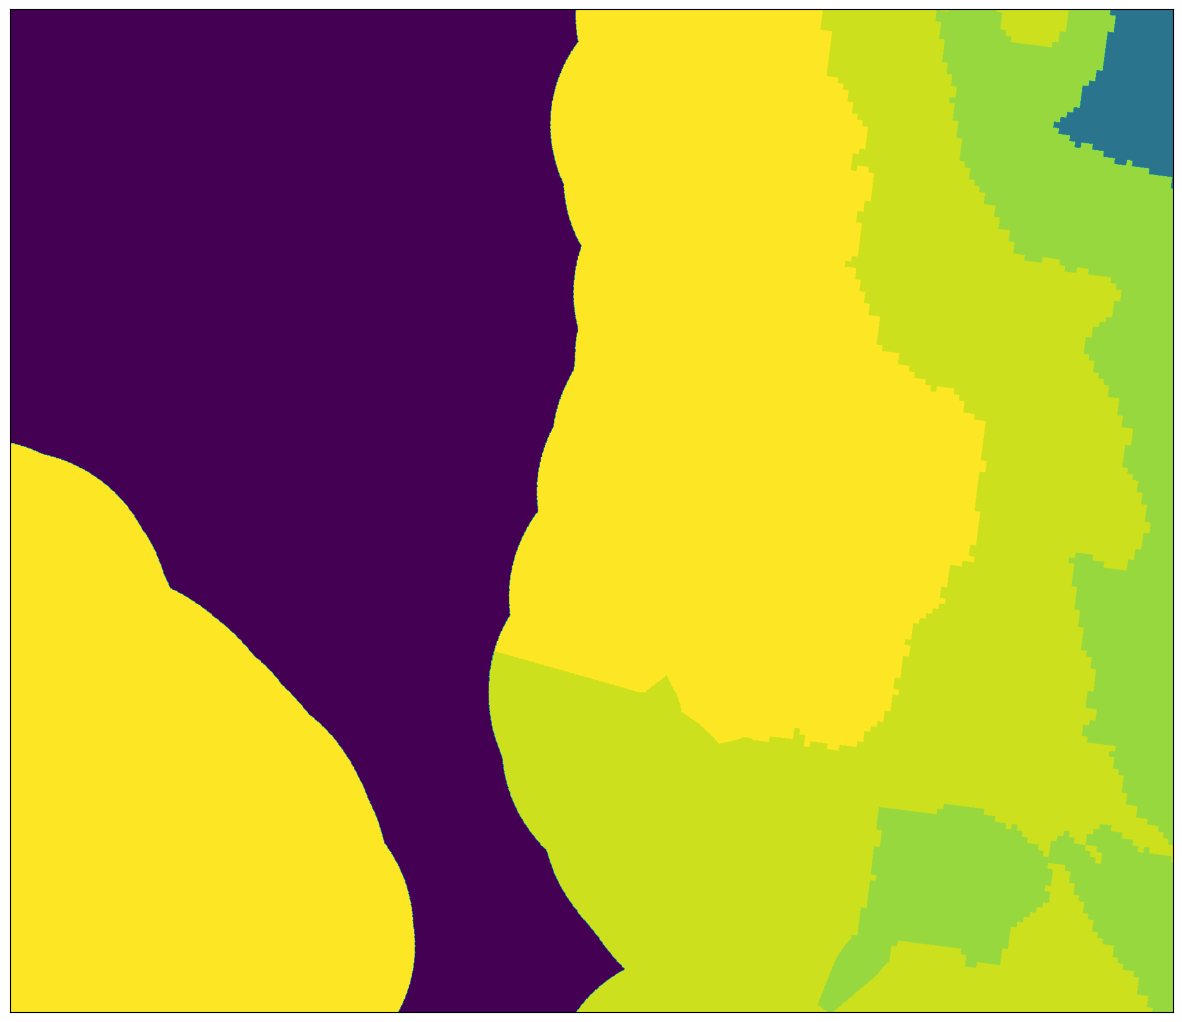

In [54]:
#https://sentinelhub-py.readthedocs.io/en/latest/examples/byoc_request.html
#https://eurodatacube.com/notebooks/contributions/LPIS_LULC-Slo.ipynb



evalscript_test = """

//VERSION=3
function setup() {
  return {
    input: ["B01"],
    output: { 
        bands: 1,
        sampleType: "UINT16" // raster format will be UINT16
        }
    
  };
}

function evaluatePixel(sample) {
  return [sample.B01];
}
"""

request = SentinelHubRequest(
        evalscript=evalscript_test,
        input_data=[
            SentinelHubRequest.input_data(
                data_collection=DataCollection.env_zones_1km_v2,
            )
        ],
        responses=[
            SentinelHubRequest.output_response('default', MimeType.TIFF)
        ],
        bbox=aoi,
        size=bbox_to_dimensions(aoi, 100),
        config=config
    )
data = request.get_data()[0]
utils.plot_image(data)

In [57]:
import numpy as np
print(np.unique(data))

[ 0  5 11 12 13]


In [56]:
data

array([[ 0,  0,  0, ...,  5,  5,  5],
       [ 0,  0,  0, ...,  5,  5,  5],
       [ 0,  0,  0, ...,  5,  5,  5],
       ...,
       [13, 13, 13, ..., 11, 11, 11],
       [13, 13, 13, ..., 11, 11, 11],
       [13, 13, 13, ..., 11, 11, 11]], dtype=uint16)